# Regression of linear and non-linear functions using neural networks with Tensorflow

Neural Networks have being used to solve some complicated problems in the last few years. One thing all those problems have in common, is that they all have strong non-linear features.
In this Notebook, we will breafily explore how neural networks deals with non-linearities

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

print("tensorflow-gpu version ",tf.__version__)

import numpy as np

tensorflow-gpu version  1.12.0


First we will see how a neural network with one layer and one neuron,  output = input*w1 + b fit the function y_values = 2*x_values. As the output is linear with the input, the optimizer shall not find it hard to find the values of w1 and b.

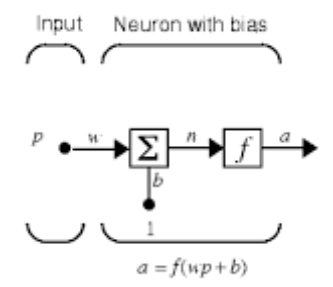

We need to create the traning data values

In [2]:
x_values = np.array([0, 1, 2, 3, 4, 5,  6],  dtype=float)
y_values = np.array([0, 2, 4, 6, 8, 10, 12],  dtype=float)

Then we built the nn with keras

In [3]:
layer1 = tf.keras.layers.Dense(units=1,input_shape=[1])  
model = tf.keras.Sequential([layer1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


This network has 2 trainable parameters, one weight and one bias.
We will compile the network using the optmizer Adam to minimize the MSE. Adam can cause some trouble with sparse datasets, but as we shall see, it will not be the case

In [4]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

We train the network for 500 epochs, then plot loss to see if this is enough

In [5]:
history = model.fit(x_values, y_values, epochs=500, verbose=False)
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

print("These are the layer variables, w*x + b: {}".format(layer1.get_weights()))

<Figure size 640x480 with 1 Axes>

These are the layer variables, w*x + b: [array([[1.9999999]], dtype=float32), array([4.7376076e-07], dtype=float32)]


Let's test that. We will use data in the training set to evaluate the network just to get the graph. It is terribly wrong in data science and machine learning to evaluate models with training data. please dont do that.

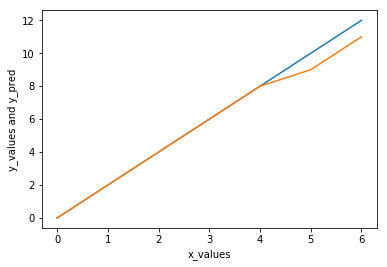

In [6]:
y_pred = np.array([int(model.predict([0])),
                   int(model.predict([1])),
                   int(model.predict([2])),
                   int(model.predict([3])),
                   int(model.predict([4])),
                   int(model.predict([5])),
                   int(model.predict([6]))],  dtype=float)

plt.plot(x_values,y_values)
plt.plot(x_values,y_pred)
plt.xlabel("x_values")
plt.ylabel("y_values and y_pred")

plt.show()

Note: this plot should be one straight line (y = ax+b) but for some reason, matplotlib messes it

Now we will do the same with a quadratic function. As it is quadratic, we have no hope of fitting it with the network above, simple a*w1+b wont do. One thing we could try is to stack more layers in the network and use more neurons

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


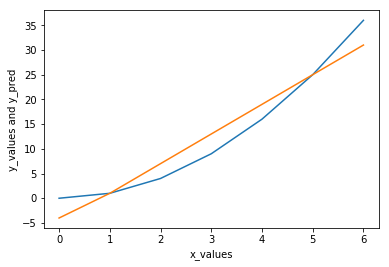

In [7]:
x_values = np.array([0, 1,  2,  3, 4, 5,  6],  dtype=float)
y_values = np.array([0,  1, 4, 9, 16, 25, 36],  dtype=float)
layer1 = tf.keras.layers.Dense(units=5,input_shape=[1])  
layer2 = tf.keras.layers.Dense(units=10) 
layer3 = tf.keras.layers.Dense(units=1) 
del model
model = tf.keras.Sequential([layer1,layer2,layer3])
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x_values, y_values, epochs=500, verbose=False)
y_pred = np.array([int(model.predict([0])),
                   int(model.predict([1])),
                   int(model.predict([2])),
                   int(model.predict([3])),
                   int(model.predict([4])),
                   int(model.predict([5])),
                   int(model.predict([6]))],  dtype=float)

plt.plot(x_values,y_values)
plt.plot(x_values,y_pred)
plt.xlabel("x_values")
plt.ylabel("y_values and y_pred")

plt.show()

It didn't work we got a linear model even with more layers. The superposition theorem tells us that the sum of two or more linear systems will always be linear. This is why we could use one neuron to fit the first function but will not be able to fit the second, it does not matter how many neurons and layers we use, beucause it will still look something like y = a0*w0+a1*w1+... it will be linear.
To model non-linear functions, we need non-linearities.
The non-linearities are inserted in the nn using activation-functions, relu and elu for exemple

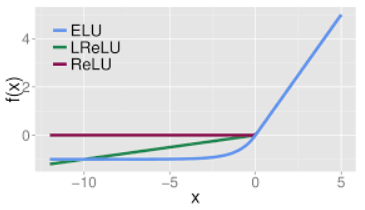

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


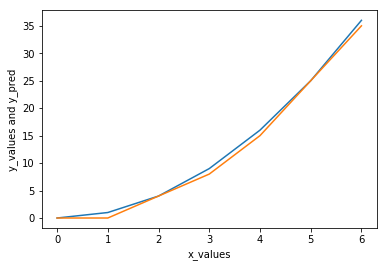

In [8]:
x_values = np.array([0, 1,  2,  3, 4, 5,  6],  dtype=float)
y_values = np.array([0,  1, 4, 9, 16, 25, 36],  dtype=float)

#'elu' is the non-linearitie we will use, it is a better version of the relu, because 'elu' is smooth
# around zero, in consequence, is derivative has no jumps, it makes the convergence faster but computations slower
# because it has exponentials in it

layer1 = tf.keras.layers.Dense(units=5,input_shape=[1],activation = 'elu')  
layer2 = tf.keras.layers.Dense(units=10,activation = 'elu') 
layer3 = tf.keras.layers.Dense(units=1,activation = 'elu') 
del model
model = tf.keras.Sequential([layer1,layer2,layer3])
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x_values, y_values, epochs=500, verbose=False)
y_pred = np.array([int(model.predict([0])),
                   int(model.predict([1])),
                   int(model.predict([2])),
                   int(model.predict([3])),
                   int(model.predict([4])),
                   int(model.predict([5])),
                   int(model.predict([6]))],  dtype=float)

plt.plot(x_values,y_values)
plt.plot(x_values,y_pred)
plt.xlabel("x_values")
plt.ylabel("y_values and y_pred")

plt.show()

# Conclusion

In control systems, our professors are always saying things like 'everything real is non-linear', altough we try our best to model systems with linear functions they are just aproximations, and for complex systems, it gets harder and harder to model systems with linear functions because some of them have some really strong non-linearities.
In data science and machine learning, we are trying to solve complex problems like classification and regression on pretty non-linear data-sets, thats why neural networks are the weapon of choice, and they aproximate non-linear functions because of the non-linear activation functions.